In [2]:
#importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

### Loading and Exploring The Data

In [3]:
df=pd.read_csv('DataSet2.csv')

In [4]:
df.shape

(1700, 12)

In [5]:
df.head() #First 5 rows in the DataFrame

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,a,-0.375866,0.427942,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700
1,0,b,0.047819,0.115627,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961
2,1,d,0.372868,-0.263291,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491
3,0,c,0.059598,0.270797,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046
4,1,d,0.616319,0.291275,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313


In [6]:
df.tail() #Last 5 rows in the DataFrame

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
1695,1,c,0.541717,0.072494,-1.571099,0.241235,-1.694391,-0.523919,0.440969,-0.099387,1.268869,1.010457
1696,0,c,-0.525727,0.408316,-1.175430,2.058188,1.197211,-1.303748,-0.440300,0.271271,0.339463,-0.272108
1697,0,c,-0.731380,0.164950,-0.477654,-0.057856,0.598471,-1.114582,0.005753,2.407644,0.239817,1.477723
1698,0,c,-0.448287,0.359409,0.983409,-1.057294,-0.501924,0.808380,-1.330170,3.595073,-0.716719,-0.891881
1699,0,b,-0.778458,-0.260288,1.818800,-0.224182,-0.311970,-1.933239,-1.097035,-0.158764,-1.003412,1.239610


##### An initial look at the dataset reveals that it consists of 11 independent features, and 1 dependent feature. 10 of the independent features are numerical whereas one of them is a categorical feature.

In [7]:
df.x1.unique() #The unique values of x1 feature

array(['a', 'b', 'd', 'c'], dtype=object)

In [8]:
df_x1=pd.get_dummies(df['x1'],drop_first=True) #one hot encoding the categorical variable

In [9]:
#Checking The count of each class in the target feature
df['y'].value_counts()

0    1000
1     700
Name: y, dtype: int64

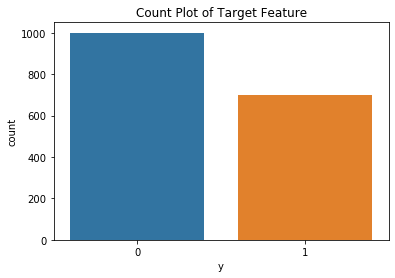

In [10]:
# Count Plot to visualize the counts
plt.title('Count Plot of Target Feature')
ax = sns.countplot(x="y", data=df)

In [11]:
#dropping the original categorical variable
df1=df.iloc[:,2:] 
y=df.iloc[:,0]
df1.head()

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,-0.375866,0.427942,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700
1,0.047819,0.115627,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961
2,0.372868,-0.263291,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491
3,0.059598,0.270797,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046
4,0.616319,0.291275,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313


In [12]:
#concatenating the one hot encoded columns to the dataframe
df_new=pd.concat([df1,df_x1],axis=1)
df_new.head()

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,b,c,d
0,-0.375866,0.427942,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700,0,0,0
1,0.047819,0.115627,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961,1,0,0
2,0.372868,-0.263291,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491,0,0,1
3,0.059598,0.270797,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046,0,1,0
4,0.616319,0.291275,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313,0,0,1


In [13]:
df_new.describe(include='all') #statistics of each column/feature

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,b,c,d
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,-0.066277,0.025411,-0.004941,-0.018150,0.004139,-0.004442,0.039203,-0.024454,-0.008586,0.005379,0.253529,0.234706,0.258235
std,0.421414,0.284509,1.001383,0.983988,1.031957,1.033610,0.978798,0.987621,0.993979,1.017824,0.435159,0.423940,0.437793
min,-0.925228,-0.931249,-3.547109,-4.166713,-3.271321,-3.050503,-3.188723,-3.691485,-3.426298,-4.075024,0.000000,0.000000,0.000000
25%,-0.383928,-0.189961,-0.693761,-0.630827,-0.717443,-0.679205,-0.606272,-0.691628,-0.643558,-0.679580,0.000000,0.000000,0.000000
50%,0.018826,0.011861,0.002496,0.008173,0.015596,-0.021232,0.049557,-0.040668,0.012354,0.009655,0.000000,0.000000,0.000000
75%,0.156138,0.270204,0.697783,0.638092,0.748816,0.713769,0.673363,0.629988,0.654637,0.692432,1.000000,0.000000,1.000000
max,0.696405,0.567431,2.977407,3.434698,3.575212,3.387439,4.651006,3.763927,3.259833,3.095674,1.000000,1.000000,1.000000


In [14]:
#Checking the total number of null values in each column/feature
df_new.isnull().sum()

x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
b      0
c      0
d      0
dtype: int64

### Modeling

In [15]:
#Splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(
df_new.values, y, random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1275, 13) (425, 13) (1275,) (425,)


#### Baseline Model, Dummy Classifier

In [16]:
#Building a dummy baseline model. This model just assigns the majority class as predicted target class for all records.
dummy = DummyClassifier(strategy='stratified', random_state=1)
dummy.fit(x_train,y_train)
dummy.score(x_test,y_test)

0.5317647058823529

In [17]:
#standardize the features, so that no feature dominates, and so that the scales can be ignored
scaler= StandardScaler()
x_standardized = scaler.fit_transform(x_train)
x_test_st=scaler.fit_transform(x_test)

#### Baseline logistic regression model

In [18]:
#I used logistic regression as it can be interpreted easily as opposed to algorithms like randomforests. If we want to know 
#why certain records were misclassified we can look at the feature coefficients, and see how/why the model wrongly classified that data point
logistic_regression = LogisticRegression(random_state=0)
lr_model=logistic_regression.fit(x_standardized,y_train) #fitting the model
y_pred=lr_model.predict(x_test_st) #predicting values for test data

C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
print(classification_report(y_test, y_pred))
#precision = TP/TP+FP
#recall = TP/TP+FN
#F1 score = 2*Precision*Recall/(Precision+Recall)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       256
           1       0.86      0.82      0.84       169

    accuracy                           0.88       425
   macro avg       0.87      0.87      0.87       425
weighted avg       0.88      0.88      0.88       425



In [20]:
# The coefficients of the features
lr_model.coef_

array([[ 4.97343071, -3.11845574,  0.05190365,  0.03230276, -0.06920039,
        -0.07665628, -0.06031583,  0.11963035,  0.21816348, -0.01492455,
         0.01277306, -0.0838549 , -0.01587319]])

#### Logistic Regression with a list of Cs(1/regularization strength parameter)

In [21]:
#we do a cross validated logistic regression. In this case we are trying to find the best C(regularization strength parameter). 
lr_cv = LogisticRegressionCV(
 penalty='l1', Cs=10, random_state=0,solver='liblinear')
lr_cv = lr_cv.fit(x_standardized, y_train)
y_pred_cv=lr_cv.predict(x_test_st)

C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [22]:
#The chosen C
lr_cv.C_

array([0.35938137])

In [23]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       256
           1       0.86      0.82      0.84       169

    accuracy                           0.88       425
   macro avg       0.87      0.87      0.87       425
weighted avg       0.87      0.88      0.87       425



#### Logistic Regression with Gridsearch to find the best combination of parameters 

In [24]:
#Performing Gridsearch to find the best combination of hyperparameters(in this case what type of regularization and C)
penalties = ['l1', 'l2'] #penalty list
Cs = np.logspace(0, 15, 10) #range of Cs
hyperparameters = dict(C=Cs, penalty=penalties) #dictionary of hyperparameters
gridsearch = GridSearchCV(logistic_regression, hyperparameters, cv=7, verbose=0) #gridsearch to find the best combination of parameters
b_m = gridsearch.fit(x_standardized, y_train)


C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [25]:
b_m.best_estimator_.get_params()['penalty'] #penalty chosen by the best model

'l1'

In [26]:
b_m.best_estimator_.get_params()['C'] #regularization strength chosen by best model

1.0

In [27]:
bm_y_pred=b_m.predict(x_test_st)
print(classification_report(y_test, bm_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       256
           1       0.86      0.83      0.84       169

    accuracy                           0.88       425
   macro avg       0.87      0.87      0.87       425
weighted avg       0.88      0.88      0.88       425



#### Finding F1 Scores for different threshold values, to check which threshold value is best for the Logistic regression model

In [28]:
th_li = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99] #list of thresholds
pred_proba_df = pd.DataFrame(b_m.predict_proba(x_test_st)) #dataframe of class probabilities

In [29]:
pred_proba_df.head()

,0,1
0,0.656705,0.343295
1,0.979927,0.020073
2,0.999988,0.000012
3,0.686832,0.313168
4,0.000061,0.999939


In [30]:
#Finding the F1 scores for different threshold values to check which threshoold gives the best F1 score
f1_list=[]
for i in th_li:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0) #make the value 1 if the value more than a particular threshold
    f1 =f1_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('f1_score is {}'.format(f1))
    f1_list.append(f1)


******** For i = 0.05 ******
f1_score is 0.786046511627907

******** For i = 0.1 ******
f1_score is 0.8066825775656324

******** For i = 0.15 ******
f1_score is 0.8144578313253013

******** For i = 0.2 ******
f1_score is 0.824390243902439

******** For i = 0.25 ******
f1_score is 0.8279301745635911

******** For i = 0.3 ******
f1_score is 0.8186528497409326

******** For i = 0.35 ******
f1_score is 0.8086253369272238

******** For i = 0.4 ******
f1_score is 0.8112676056338027

******** For i = 0.45 ******
f1_score is 0.8187134502923976

******** For i = 0.5 ******
f1_score is 0.8433734939759036

******** For i = 0.55 ******
f1_score is 0.839506172839506

******** For i = 0.6 ******
f1_score is 0.8417721518987341

******** For i = 0.65 ******
f1_score is 0.8403908794788274

******** For i = 0.7 ******
f1_score is 0.8305647840531561

******** For i = 0.75 ******
f1_score is 0.8175675675675675

******** For i = 0.8 ******
f1_score is 0.8096885813148789

******** For i = 0.85 ******
f1_sc

C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


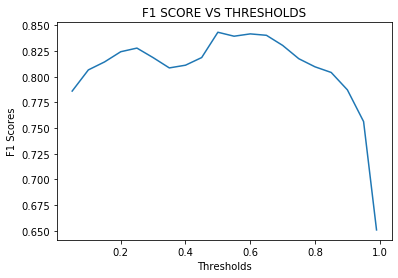

In [31]:
plt.title('F1 SCORE VS THRESHOLDS')
plt.xlabel('Thresholds')
plt.ylabel('F1 Scores')
plt.plot(th_li,f1_list)
plt.show()

#### Random Forest model

In [32]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_standardized, y_train)
rf_y_pred=rf.predict(x_test_st)
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       256
           1       0.99      0.98      0.99       169

    accuracy                           0.99       425
   macro avg       0.99      0.99      0.99       425
weighted avg       0.99      0.99      0.99       425



C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Finding Importances of Features

In [33]:
#Looking at the feature importances we see that the first two features are the most important(x2 and x3).
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]#sorting the indices by importance
print("The importances are:",importances)
print("The importance of features in decreasing order are:",indices)

The importances are: [0.49507323 0.34918409 0.01713779 0.0233304  0.0221065  0.01322352
 0.02012334 0.01539666 0.02195485 0.01735592 0.00089685 0.00266862
 0.00154822]
The importance of features in decreasing order are: [ 0  1  3  4  8  6  9  2  7  5 11 12 10]


#### Building Random Forest Model with five of the most important features

In [34]:
filter_indices = [0,1]
x_train_imp=np.take(x_standardized, filter_indices, axis=1) #keeping only top 2 features with highest importance
x_train_imp.shape

(1275, 2)

In [35]:
x_test_imp=np.take(x_test_st, filter_indices, axis=1)
x_test_imp.shape

(425, 2)

In [36]:
# Building a random forest model with only the first two features we see that the performance is as good as the performance of
# the random forest with all the features considered
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_imp, y_train)
rf_y_pred=rf.predict(x_test_imp)
print(classification_report(y_test, rf_y_pred))

C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       256
           1       0.99      0.98      0.99       169

    accuracy                           0.99       425
   macro avg       0.99      0.99      0.99       425
weighted avg       0.99      0.99      0.99       425



#### Handling Imbalanced Class with Random Forest

In [37]:
# As the classes are imbalanced I built a random forest model with balanced class weight. What this does this give a higher weight
# to minority class than the majority class. We see that the performance after weighting is excellent.
rf = RandomForestClassifier(
 random_state=0, class_weight="balanced")
# class weight = n/(k * nj)
#n=total number of observations, k= total number of classes, nj=number of observations in class j
rf = rf.fit(x_standardized, y_train)
rf_bal_pred=rf.predict(x_test_st)
print(classification_report(y_test, rf_bal_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       256
           1       0.99      0.98      0.99       169

    accuracy                           0.99       425
   macro avg       0.99      0.99      0.99       425
weighted avg       0.99      0.99      0.99       425



C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Adaboost Model

In [38]:
# Boosting algorithm performance on the dataset.
adaboost = AdaBoostClassifier(random_state=0)
ad = adaboost.fit(x_standardized, y_train)
ad_pred=ad.predict(x_test_st)
print(classification_report(y_test, ad_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       256
           1       1.00      0.98      0.99       169

    accuracy                           0.99       425
   macro avg       0.99      0.99      0.99       425
weighted avg       0.99      0.99      0.99       425



#### Finding Records that were misclassified

In [39]:
#indices of all records that were misclassified, using logistiregressioncv model
mis = np.where(y_test != lr_cv.predict(x_test_st))
mis

(array([  8,  14,  15,  20,  35,  38,  43,  52,  57,  60,  63,  64,  70,
         72,  73,  79,  86,  94,  97, 102, 112, 122, 124, 126, 130, 139,
        154, 174, 176, 181, 182, 189, 208, 209, 242, 269, 293, 303, 305,
        321, 328, 336, 348, 360, 363, 364, 370, 371, 376, 382, 407, 413,
        422], dtype=int64),)

In [40]:
lr_cv.coef_ #The coeffiecients of each feature

array([[ 5.31299201, -3.30191002,  0.0112637 ,  0.        , -0.03151588,
        -0.04471731, -0.02620369,  0.09576702,  0.18453021,  0.        ,
         0.        , -0.05470971,  0.        ]])

In [41]:
#data_test=pd.concat([pd.DataFrame(x_test_st),y_test,pd.Series(y_pred_cv)],axis=1)

In [42]:
x_test_st.shape

(425, 13)

In [43]:
np.expand_dims(y_test, axis=1).shape #to provide second dimension to ytest, same procedure is done for ypred

(425, 1)

In [44]:
data_test=np.hstack((x_test_st,np.expand_dims(y_test, axis=1),np.expand_dims(y_pred_cv, axis=1))) #concatenating the data, actual targets, predicted vallues together

In [45]:
data_test=pd.DataFrame(data_test)
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.509487,0.486423,0.018868,0.552058,-0.513146,-0.050364,-1.724537,-0.036223,0.633430,0.567305,-0.62361,-0.583690,1.779513,0.0,0.0
1,0.529733,1.110619,-1.388080,-0.556127,0.718453,0.826472,-0.942145,-0.502333,-1.746293,-1.101316,-0.62361,1.713238,-0.561951,0.0,0.0
2,-0.531939,1.518358,-1.766048,0.631121,-0.044027,-0.658872,1.115515,0.452673,-0.963870,-0.483150,-0.62361,-0.583690,1.779513,0.0,0.0
3,0.228240,-0.075905,1.848626,-0.334706,1.488867,0.571497,0.401286,-0.415626,-0.602191,0.773366,-0.62361,-0.583690,1.779513,0.0,0.0
4,1.611387,-0.484740,1.211679,-2.936406,-0.043080,-0.044310,0.414860,0.539381,1.112503,-0.632662,-0.62361,-0.583690,1.779513,1.0,1.0


In [46]:
lr_cv.coef_ #coefficients of the features

array([[ 5.31299201, -3.30191002,  0.0112637 ,  0.        , -0.03151588,
        -0.04471731, -0.02620369,  0.09576702,  0.18453021,  0.        ,
         0.        , -0.05470971,  0.        ]])

In [47]:
data_test.iloc[mis] #DataFrame of all misclassified records

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
8,0.570477,0.213404,0.890349,-0.147439,1.990126,-0.761451,0.339955,-0.810964,1.438997,0.287414,1.603567,-0.583690,-0.561951,0.0,1.0
14,0.124164,-0.261967,0.898710,-0.212416,0.439933,0.477081,-0.737784,1.681344,-0.114237,1.085141,-0.623610,-0.583690,1.779513,1.0,0.0
15,0.069134,-0.321564,-0.726354,0.019048,-0.144728,2.590595,0.276171,-1.268726,0.674310,-0.155300,-0.623610,-0.583690,1.779513,1.0,0.0
20,0.177450,-0.111869,1.260612,-0.337727,0.203715,-1.056401,0.252330,-1.398638,-0.140565,-0.049648,1.603567,-0.583690,-0.561951,1.0,0.0
35,0.138507,-0.134612,0.854455,0.364880,1.131730,-1.013236,0.452629,1.127784,-1.360652,-0.704170,1.603567,-0.583690,-0.561951,1.0,0.0
38,0.120644,-0.179484,0.656598,0.069878,0.592357,0.282234,-0.945014,-1.551942,-1.379001,-3.006900,1.603567,-0.583690,-0.561951,1.0,0.0
43,0.141096,-0.245467,-0.338976,0.503314,-0.816049,-0.633711,0.262273,-2.160652,-0.125377,-1.194919,-0.623610,-0.583690,-0.561951,1.0,0.0
52,0.129750,-0.185876,-1.550975,-0.768215,-0.131383,1.256000,1.118221,-0.086961,-0.370840,-1.954281,1.603567,-0.583690,-0.561951,1.0,0.0
57,0.054896,-0.214768,-0.227539,-0.186961,-0.961218,1.451368,-0.842000,-0.189125,-0.707262,-1.409180,1.603567,-0.583690,-0.561951,1.0,0.0
60,0.429239,0.050459,-1.135358,1.197269,1.182529,-0.965997,-0.730104,-0.844970,1.649886,1.026833,-0.623610,1.713238,-0.561951,0.0,1.0


#### Looking at the feature coefficients(of first and second feature) and the predicted target class it is evident why the records were misclassified. We see that the when the first feature value in any record is hugely positive the predicted y is 1 and if the second feature value in any record is hugely negative the predicted y is 0.

 a) To your team: why it is the best model? Give an example of a data point that model doesn’t do well and explain the characteristics of that observation. How- do you see the limitations of your model? How do you plan to improve it?

#### Ans. Take example of a data which has been severely misclassified and look at its features. Try to form a narrative as to why the data point was misclassified looking the model feature importance and individual features

 b 1).  A few days after you finish the initial model, you learn new information that the value of the X2 feature makes sense only if it is positive (i.e. X2 > 0 should be in the model instead of original X2). Show how you would address this issue.
#### Ans. check how many data points in the original data have X2 < 0. If the number is very less we can retrain the model by dropping those data points where X2<0. If almost 50% of the data have X2 < 0 then the variable would be no longer reliable since business intuition tell us X2 > 0. In this case there is no other way than to drop the variable


 b 2). Later, you additionally learn that X4 should’ve been used as an indicator variable (e.g. X4 that is greater than a certain threshold should be treated differently than X4 values below that threshold). However, you don’t know the value of threshold. Adapt your code to support a systematic way of finding threshold which leads to improved model performance.
#### Ans. Approach 1. Iterate through all the records in x4, in each iteration use the corresponding x4 value as the threshold for predicting the target class(if the x4 value is greater than the current threshold assign 1 else 0). Calculate the F1 score for each of these thresholds, the threshold with the highest F1 score will be our final threshold.  
    
#### Approach 2. Build a single variable decision tree having 2 leaves with the X4 variable as the predictor and y as the target variable on the train data. Since the decision tree will select the value of the continuous variable which results in the most homogenous split,  the threshold where the tree splits can be the threshold for converting X4 to an indicator variable


In [48]:
df = pd.read_csv('./DataSet2.csv')
df[['y', 'x4']].head()

,y,x4
0,0,-0.922338
1,0,-1.781739
2,1,-1.120545
3,0,0.961795
4,1,-1.113519


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[['x4']], df[['y']])

clf = DecisionTreeClassifier(max_leaf_nodes=2, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [50]:
def f(x):
    # return math.sqrt(x)
    return 'r' if x == 1 else 'g'


color_mask = np.array([f(xi) for xi in y_train.values])

In [51]:
clf.tree_.threshold[0]

-1.741030514240265

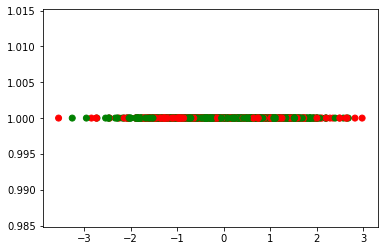

In [52]:
plt.scatter(X_train, np.ones(len(X_train)), c = color_mask) #checking which records have class 0 and which have class 1

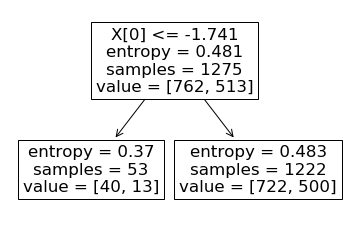

In [53]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

b 3).	Now that you realize feature engineering is a frequent need for improving our models, you want to create a general framework to tackle such situations (e.g. conversion to indicators, defining certain thresholds, etc.). What function/module do you develop to enable user-defined column conversions for given thresholds? Suppose thresholds are given to you as arguments to your function. 

In [54]:
def f(x, th):
    return 1 if x >= th else 0 #return 1 if value grater than equal to threshold else 0

def continous_to_indicator(df, thresholds):
    for index, threshold in  enumerate(thresholds):
        if threshold is not None:
            df.iloc[:, index] = np.array([f(xi, threshold) for xi in df.values[:,index]]) #iterate through the list and for each threshold which is not None change the column accordingly 
    return df


In [55]:
df_temp=df_new.copy()

In [56]:
df_new.head() #old DataFrame

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,b,c,d
0,-0.375866,0.427942,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700,0,0,0
1,0.047819,0.115627,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961,1,0,0
2,0.372868,-0.263291,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491,0,0,1
3,0.059598,0.270797,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046,0,1,0
4,0.616319,0.291275,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313,0,0,1


In [57]:
func=continous_to_indicator(df_temp, [None,0.2,None,1,None,None,2,3,0.4,0.5,0.6,0.8,0.9])
func.head() #the modified DataFrame

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,b,c,d
0,-0.375866,1,-0.922338,0,0.109015,0.621001,0,0,0,0,0,0,0
1,0.047819,0,-1.781739,0,0.392783,1.094168,0,0,0,0,1,0,0
2,0.372868,0,-1.120545,0,0.830072,-1.727836,0,0,0,0,0,0,1
3,0.059598,1,0.961795,0,2.931330,1.891656,0,0,0,0,0,1,0
4,0.616319,1,-1.113519,0,-0.287989,-0.842649,0,0,1,0,0,0,1
